## Predicting if a person has diabetes or not - Using KNN Algorithm

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import datasets,neighbors
from sklearn import metrics
import seaborn as sns
import matplotlib.ticker as ticker

### Reading the data

In [14]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 Since values of cols like **'Glucose','BloodPressure'** etc cannot be accepted as 0. Therefore replacing the values with mean of respective col

In [40]:
no_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in no_zero:
    df[col] = df[col].replace(0,np.NaN)
    mean = int(df[col].mean(skipna = True))
    df[col]=df[col].replace(np.NaN,mean)

### Vizualing the data

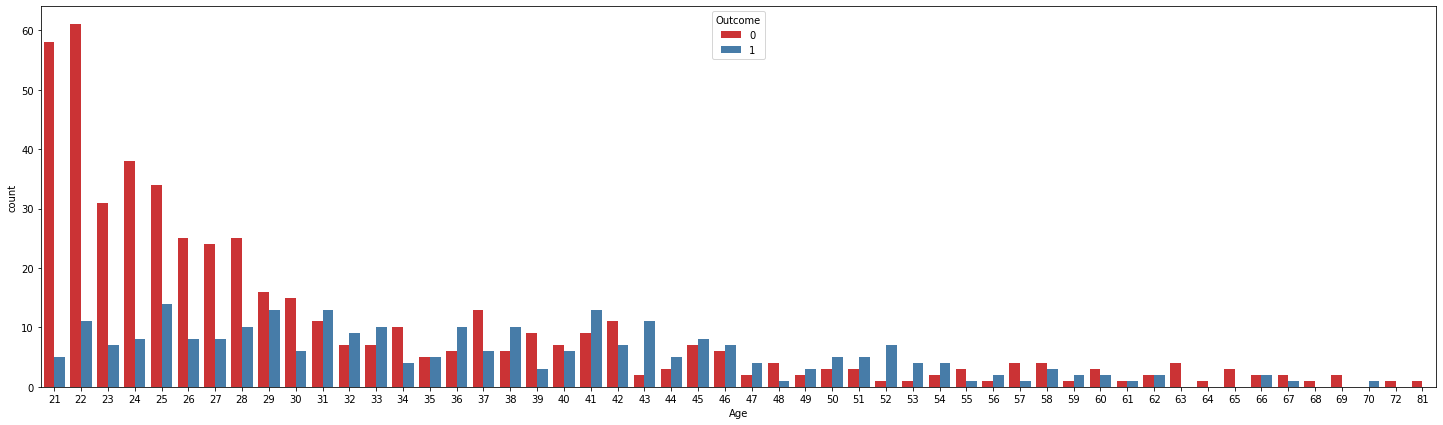

In [16]:
#Exploring data before preprocessing
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=df,palette='Set1')
plt.show()

Text(0, 0.5, 'Outcome')

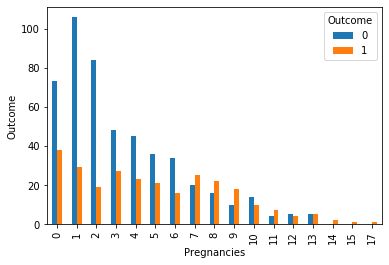

In [34]:
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind='bar')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')

### Splitting dataset into train and test 

In [42]:
X = df.iloc[:, 0:8]
y = df.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)


###  Feature Scaling

In [43]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



## Finding the optimal value of k and predicting accuracy

### 1. Error rate vs k value

Minimum error:-  0.17532467532467533 at k =  31


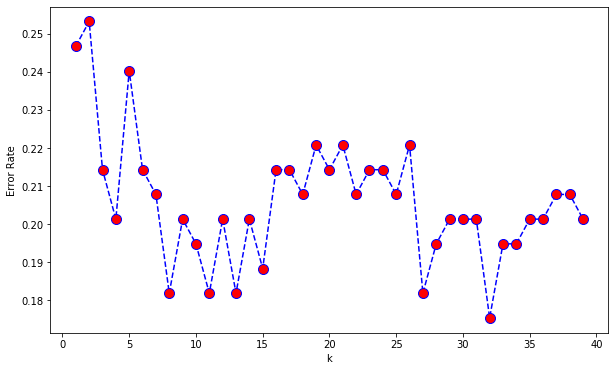

In [44]:
error_rate=[]
for i  in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k')
plt.ylabel('Error Rate')
print('Minimum error:- ',min(error_rate),'at k = ',error_rate.index(min(error_rate)))

### 2. Accuracy vs k value

Maximum Accuracy;-  0.8246753246753247 at k =  31


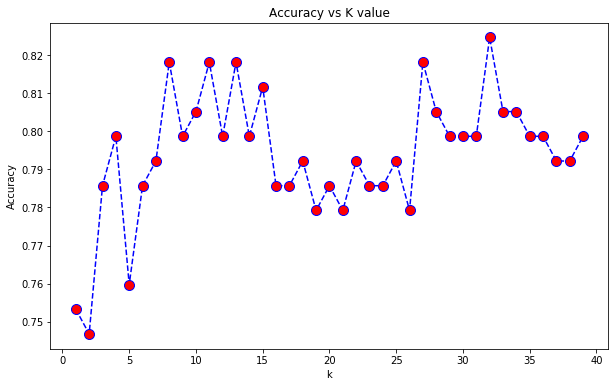

In [45]:
acc=[]
for i in range(1,40):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10 )
plt.title('Accuracy vs K value')
plt.xlabel('k')
plt.ylabel('Accuracy')
print('Maximum Accuracy;- ',max(acc),'at k = ',acc.index(max(acc)))

### Evaluating the model

In [46]:
confmatr = confusion_matrix(y_test,yhat)
print(confmatr)

[[98  9]
 [22 25]]


Therefore, from our prediction we see that we predicted, **98 people are diabetic and they actually are diabetic, 25 people as non daibetic and they actually are not diabetic , 22 people as non-diabetic but they actually are diabetic and 9 people as diabetic but they actually are not diabetic**.

In [47]:
print('f1 Score: ',f1_score(y_test,yhat))
print('Accuracy Score: ',accuracy_score(y_test,yhat))

f1 Score:  0.617283950617284
Accuracy Score:  0.7987012987012987
